## Практическое задание 2

Выполнила Головина Мария, БЭК145, 4-сложная

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1999]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2000]:
def max_element(x):
    ind = np.where(x==0) + np.ones(len(np.where(x==0)[0]))
    ind = np.array(list(map(int, ind.reshape(ind.shape[1],))))
    if ind.size:
        return np.max(x[ind[ind<=x.shape[0]-1]])

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [2001]:
def nearest_value(X, v):
    return X.ravel()[np.argmin(abs(X-v))]

In [2002]:
X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [2003]:
def scale(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    if len(np.where(std==0)[0])==0:
        return (X - mean) / std
    else:
        zerorows = np.where(rowstds==0)
        Xstd[Xstd == 0] = 1
        print('The following rows were not divided by STD=0:', ','.join(map(str, zerorows)))
        return (X - mean) / std 

In [2004]:
matr = np.random.randint(low=0, high=20, size = (5,5))
scale(matr)

array([[-0.09805807,  0.45485883, -1.16563101, -0.22406454, -1.68225038],
       [-0.09805807, -1.44038628,  0.2331262 , -1.18434114,  0.98473193],
       [-1.07863874, -0.30323922, -0.93250481,  1.69648866,  0.98473193],
       [-0.58834841, -0.30323922,  1.63188341,  0.41611986, -0.45133547],
       [ 1.86310328,  1.59200589,  0.2331262 , -0.70420284,  0.16412199]])

**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [2005]:
matr = np.random.normal(10, 1, size = (4,4))
matr

array([[ 10.18863421,  10.76701435,  10.89786593,   9.97323908],
       [  8.40655281,  10.08701796,   9.87098155,  10.22026948],
       [  9.19837056,  10.08227347,   8.90560586,   9.75158037],
       [  7.73408463,  11.58111086,  11.60536065,   9.85289384]])

In [2006]:
def get_stats(X):
    try:        
        det = np.linalg.det(X)
        trace = np.trace(X)
        min_ = np.min(X)
        max_ = np.max(X)
        norm = np.linalg.norm(X)
        eigenvals = np.linalg.eigvals(X)
        inv = np.linalg.inv(X)
    except:
        min_ = np.min(X)
        max_ = np.max(X)
        norm = np.linalg.norm(X, ord = 'fro')
    try:
        return {'det': det, 'trace': trace, 'min': min_, 'max': max_, 
                'fro norm': norm,'eigenvalues': eigenvals, 'inv': inv}
    except:
        return {'min': min_, 'max': max_, 'fro norm': norm}

In [2007]:
get_stats(matr)

{'det': 47.755672987478746,
 'eigenvalues': array([ 39.68806118,   1.42851353,  -1.53293716,  -0.54948568]),
 'fro norm': 39.983016299945717,
 'inv': array([[ 0.40842701, -0.26697129,  0.08979083, -0.22535758],
        [-0.48577065, -0.98598441,  0.98792487,  0.53668542],
        [ 0.50409534,  0.36748327, -0.86205782, -0.03824412],
        [-0.34337664,  0.93564364, -0.21630451, -0.30738603]]),
 'max': 11.605360651056685,
 'min': 7.7340846299505772,
 'trace': 39.034151869807147}

**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [2008]:
lst = []
for exp_num in range(100):
    A = np.random.normal(0, 1, size = (10,10))
    B = np.random.normal(0, 1, size = (10,10))
    lst.append(np.max(np.dot(A,B)))

In [2009]:
np.mean(lst)

8.2280013189778316

In [2010]:
np.percentile(lst, 95)

11.69111093350708

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [2011]:
import pandas as pd
d = pd.read_csv('2008.csv')
d.shape

(70000, 29)

In [2012]:
print('Всего {} пропущенных элементов.'.format(d.isnull().sum().sum()))
print('{} объектов имеют хотя бы один пропуск.'.format(d.isnull().any(axis=1).sum()))
print('Хотя бы одно пропущенное значение есть в {} признаках.'.format(d.isnull().any(axis=0).sum()))

Всего 355215 пропущенных элементов.
70000 объектов имеют хотя бы один пропуск.
Хотя бы одно пропущенное значение есть в 16 признаках.


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

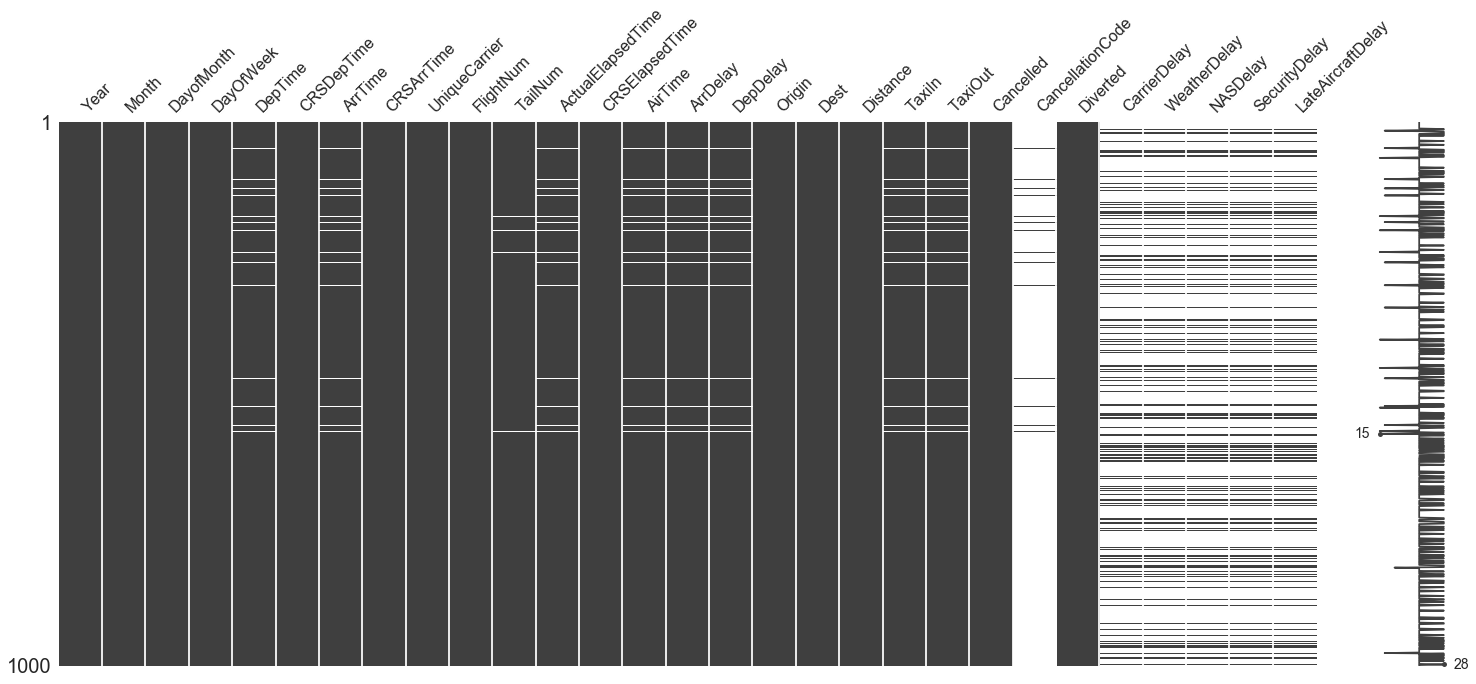

In [2013]:
import missingno as msno
msno.matrix(d.sample(1000))

In [2014]:
sum(d.DepDelay.isnull()), d[(d.Cancelled==1) & d.DepDelay.isnull()].shape[0]

(1399, 1399)

<font color='hotpink'>Есть пропуски в значениях целевой переменной, что в 100% случаев сопровождалось отменой рейса.  При этом есть 12 рейсов, для которых есть время задержки в минутах, хотя они и были отменены. Учитывая малое число таких рейсов при количестве наблюдений = 70000 можно предположить, что это ошибка в заполнении данных.


 Удаляем объекты с пропущенным или нулевым значением целевой переменной, удаляем признаки Cancelled и CancellationCode:</font>

In [2015]:
d[(d.Cancelled==1) & d.DepDelay.notnull()]['DepDelay']

5976     24.0
15680    19.0
16382    38.0
20622    -1.0
22462    -2.0
30057    28.0
33611    -4.0
37581    -1.0
40343    -5.0
50401    -2.0
50810    -7.0
67078     7.0
Name: DepDelay, dtype: float64

In [2016]:
d = d[(-d.DepDelay.isnull())&(d.DepDelay!=0)].drop(['Cancelled', 'CancellationCode'], 1).reset_index(drop=True)

In [2017]:
d.shape

(63404, 27)

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [2018]:
def extract_hr(timenum):
    if np.isnan(timenum):
        return timenum
    else:
        timenum = str(int(timenum))
        hr = timenum[:len(timenum)-2]
        if hr == '':
            return 0 # время типа 0:35 в исходных столбцах вида hhmm записано как 35
        else:
            return int(hr)

def extract_min(timenum):
    if np.isnan(timenum):
        return timenum
    else:
        timenum = str(int(timenum))
        mn = timenum[-2:]
        return int(mn)

In [2019]:
d['DepTime_Hour'], d['DepTime_Minute'] = d['DepTime'].apply(lambda x: extract_hr(x)), d['DepTime'].apply(lambda x: extract_min(x))
d['CRSDepTime_Hour'], d['CRSDepTime_Minute'] = d['CRSDepTime'].apply(lambda x: extract_hr(x)), d['CRSDepTime'].apply(lambda x: extract_min(x))
d['ArrTime_Hour'], d['ArrTime_Minute'] = d['ArrTime'].apply(lambda x: extract_hr(x)), d['ArrTime'].apply(lambda x: extract_min(x))
d['CRSArrTime_Hour'], d['CRSArrTime_Minute'] = d['CRSArrTime'].apply(lambda x: extract_hr(x)), d['CRSArrTime'].apply(lambda x: extract_min(x))

<font color='hotpink'>Кроме того, без привязки к часу, на который запланирован рейс, минуты не играют никакой роли. Правильнее всего было бы перевести данные о времени в формат десятичной дроби, где дробная часть равна минуты/60, но поскольку в задании требовалось разделить время на целочисленные часы и минуты, делать этого не будем, а просто удалим минуты.</font>

In [2020]:
d.drop(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'DepTime_Minute', 'CRSDepTime_Minute', 'ArrTime_Minute', 'CRSArrTime_Minute'], axis = 1, inplace = True)

**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

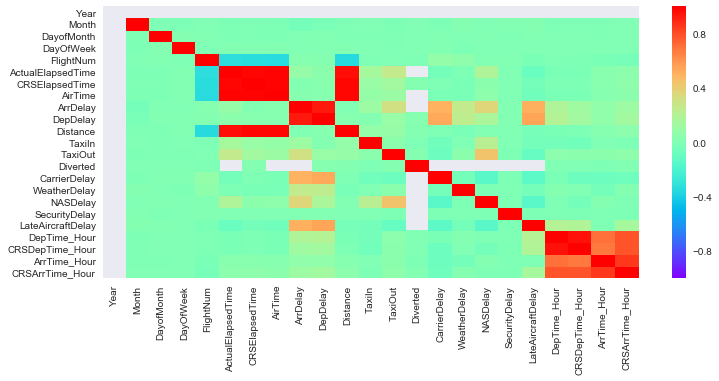

In [2021]:
from scipy.stats import pearsonr
import seaborn as sns

corr = d.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap = 'rainbow');

<font color='hotpink'> Это другие признаки, которые показывают опоздание, например, ArrDelay, значения в котором вообще по идее становятся известны позже, чем DepDelay, и напрямую от него зависят, так что использование всех этих признаков для предсказания DepDelay спорно

Задержка приземления сильно связана с задержкой вылета и с разделением времени общей задержки по её причинам(понятно): </font>

In [2022]:
d1 = d[d.ArrDelay.notnull()]
pearsonr(np.array(d1)[:, 10], np.array(d1['DepDelay']))[0]

0.93352593848198118

In [2023]:
d1 = d[d.LateAircraftDelay.notnull()]
pearsonr(np.array(d1)[:, 22], np.array(d1['DepDelay']))[0]

0.55380590359450033

In [2024]:
d1 = d[d.CarrierDelay.notnull()]
pearsonr(np.array(d1)[:, 20], np.array(d1['DepDelay']))[0]

0.17159057589661447

<font color='hotpink'>Сильно связаны признаки, отвечающие за общее время полёта (AirTime, CRSElapsedTime, Actual ElapsedTime). Последний, как и DepTime и AirTime, вообще говоря неизвестны на момент предсказания времени опоздания (а AirTime ещё и бесполезный), если решать эту задачу в режиме реального времени, а не на исторических данных, поэтому их нужно убрать.</font>

In [2025]:
pearsonr(np.array(d1['DepTime_Hour']), np.array(d1['CRSDepTime_Hour']))[0]

0.85676117596191137

In [2026]:
pearsonr(np.array(d1)[:, 7], np.array(d1['CRSElapsedTime']))[0], pearsonr(np.array(d1)[:, 7], np.array(d1['AirTime']))[0]

(0.96142993684500255, 0.96630051119815841)

In [2027]:
d.drop(['ActualElapsedTime', 'AirTime', 'TailNum', 'Year', 'ArrDelay', 'LateAircraftDelay', 'CarrierDelay'], axis = 1, inplace = True)

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [2028]:
X = d.drop(['DepDelay'], axis=1)
y = d.DepDelay

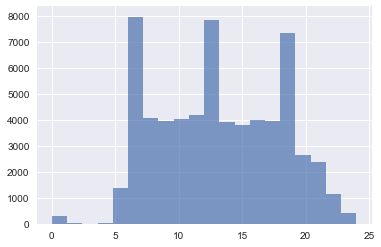

In [2029]:
X['DepTime_Hour'].hist(bins=20, alpha = 0.7);

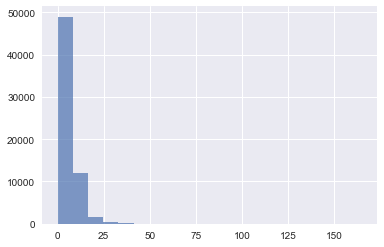

In [2030]:
X['TaxiIn'].hist(bins=20, alpha = 0.7);

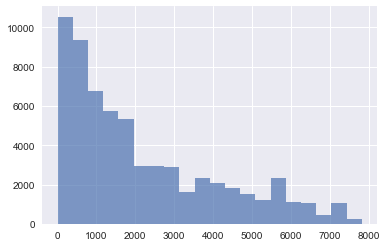

In [2031]:
X['FlightNum'].hist(bins=20, alpha = 0.7);

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

<font color='hotpink'>Из-за разницы в амплитудах признаков (последний принимает значения бОльшие абсолютно и с бОльшим разбросом) последний будет оказывать более сильное влияние на итоговый результат, даже хотя именно вариативность первых признаков может играть большую роль в объяснении дисперсии целевой переменной. 

Масштабирование позволяет выровнять амплитуду разных признаков, сохранив отношения между значениями признака для разных наблюдений. Допустим, стандартизация (вычитание среднего и деление на стандартное отклонение) центрирует их и приводит примерно к одному масштабу, в результате чего признаки начинают влиять на итоговую переменную пропорционально, без негативного эффекта их масштаба </font>

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

<font color='hotpink'>Ещё стоит удалить DepTime_Hour и FlightNum: он малоинформативен, потому что если он и передаёт какую-то информацию, она может быть почти полностью получена из сочетания origin, destination и carrier, кроме того, его некорректно использовать как числовой признак, а для категориального у него будет слишком много категорий -- почти 7 тысяч.</font>

In [2032]:
X.drop(['FlightNum', 'DepTime_Hour'], axis = 1, inplace = True)

In [2033]:
from sklearn.preprocessing import StandardScaler

def transform_data(data):
    numeric = data._get_numeric_data()
    colnames = numeric.columns
    numeric = pd.DataFrame(StandardScaler().fit_transform(numeric.fillna(value=0)))
    numeric.columns = colnames
    categorical = data.select_dtypes(exclude = [np.number, np.int64])
    categorical.fillna(value='nan')
    categoricaldummies = pd.DataFrame()
    for c in categorical.columns.values:
        categoricaldummies = pd.concat([categoricaldummies, pd.get_dummies(categorical[c], prefix=c).iloc[:, 1:]], axis = 1)
    res = pd.concat([categoricaldummies, numeric], axis = 1)
    return res

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [2034]:
Xs = transform_data(X)
Xs.shape

(63404, 625)

<font color='hotpink'> В исходных переменных Destination, Origin, Unique Carrier было  много уникальных значений, поэтому one-hot-encoding создал огромное количество бинарных признаков из них. Попробуем уменьшить число признаков. 

Логика отбора: можно усреднить значения задержек по всем аэропортам отбытия для Origin, аэропортам прибытия для Dest, перевозчикам для UniqueCarrier. Ещё лучше посчитать не среднее, а медиану задержек вылета по аэропортам, чтобы выбросы не влияли на результат. Ожидается, что аэропорты, в которых чаще остальных задерживают рейсы, будут иметь медиану выше медианы по всей выборке. 

Значение медианы или среднего не показательно для тех аэропортов, по которым мало наблюдений, и бинарные переменные, кодирующие такие аэропорты, лучше просто исключить из числа признаков, потому что оценки по ним будут неточными.</font>

In [2035]:
d['DepDelay'].median(), d['DepDelay'].mean(), d['DepDelay'].std()

(-1.0, 10.774414863415558, 36.04612679438365)

In [2036]:
dest_medians = d.groupby(['Dest']).median()['DepDelay']
origin_medians = d.groupby(['Origin']).median()['DepDelay']
uc_medians = d.groupby(['UniqueCarrier']).median()['DepDelay']

dest_medians = list(dest_medians[abs(dest_medians) >= 2].index)
origin_medians = list(origin_medians[abs(origin_medians) >= 2].index)
uc_medians = list(uc_medians[abs(uc_medians) >= 2].index)

dest_count = d.groupby(['Dest']).count()['DepDelay']
origin_count = d.groupby(['Origin']).count()['DepDelay']
uc_count = d.groupby(['UniqueCarrier']).count()['DepDelay']

dest_count = dest_count[dest_count >= 20]
origin_count = origin_count[origin_count >= 20]
uc_count = uc_count[uc_count >= 20]

dest = ['Dest_' + x for x in dest_medians if x in dest_count]
origin = ['Origin_' + x for x in origin_medians if x in origin_count]
uc = ['UniqueCarrier_' + x for x in uc_medians if x in uc_count]

In [2037]:
numcols = list(X._get_numeric_data().columns)
dropcols = [x for x in Xs.columns if x not in dest+origin+uc+numcols]
Xs.drop(dropcols, axis = 1, inplace = True)
print('Теперь осталось {} признака в датасете.'.format(Xs.shape[1]))

Теперь осталось 302 признака в датасете.


<font color='hotpink'> Сокращение признакового множества значительно уменьшает MSE / увеличивает R^2 при использовании регрессии без регуляризации, но можно было ещё оптимизировать пороговые значения для количеств наблюдений и для медианы. Но вообще незачем отбирать признаки не вручную, ведь дальше можно будет сделать это автоматически благодаря L1-регуляризации.

Тем не менее для сравнения метрики качества линейной регрессии при использовании всех 600+ признаков:</font>

In [2038]:
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(1033.4946065020229, 0.2273913541123409)

И при произведённом отборе (оставили 304):

In [2039]:
lr = LinearRegression(fit_intercept=True).fit(X_train, y_train)
y_pred = lr.predict(X_test)
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(1033.4946065020229, 0.2273913541123409)

**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [2040]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3, random_state = 42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [2041]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2042]:
def model_report(model, X_train, y_train, X_test, y_test, best_alpha = False):
    model_fit = model.fit(X_train, y_train)
    train_pred = model_fit.predict(X_train)
    test_pred = model_fit.predict(X_test)
    print("MSE train:", mean_squared_error(y_train, train_pred))
    print("R^2 train",r2_score(y_train, train_pred))
    print("MSE test:",mean_squared_error(y_test, test_pred))
    print("R^2 test:",r2_score(y_test, test_pred))
    if best_alpha:
        print("Best alpha:", model_fit.alpha_)

In [2043]:
model_report(LinearRegression(), X_train, y_train, X_test, y_test)

MSE train: 962.887504727
R^2 train 0.249420692793
MSE test: 1033.49392988
R^2 test: 0.227391859931


In [2044]:
model_report(LinearRegression(), X_train[:1000], y_train[:1000], X_test, y_test)

MSE train: 559.568194733
R^2 train 0.47201416052
MSE test: 5.26191521413e+23
R^2 test: -3.93364528735e+20


In [2045]:
max(y_pred), max(y_test)

(776.69921875, 881.0)

<font color='hotpink'>Значения коэффициентов имеют очень большой разброс. Похоже, какие-то признаки в модели (возможно, вообще нерелевантные) получили очень большие веса. Модель переобучилась, строит плохие прогнозы поэтому такие огромные значения MSE и R2.
Действительно, есть очень большие веса при том, что большая их часть имеет маленькие по модулю значения:</font> 

In [2046]:
np.median(lr.coef_), np.max(lr.coef_), np.min(lr.coef_)

(-2.1795774410289805, 28.648114321379605, -4005391137626.6084)

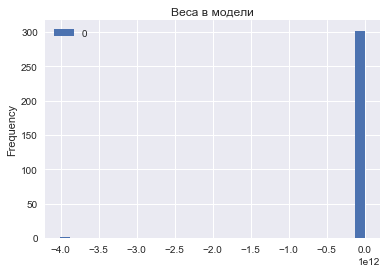

In [2047]:
pd.DataFrame(lr.coef_).plot.hist(bins=30)
plt.title('Веса в модели');

# Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [2048]:
from sklearn.linear_model import LassoCV, RidgeCV
alpha_grid_l1 = np.arange(0, 5, 0.01)
alpha_grid_l2 = np.arange(20, 43, 0.1)
lr = LinearRegression()
l1 = LassoCV(alphas = alpha_grid_l1, cv = 5).fit(X_train[:1000], y_train[:1000])
l2 = RidgeCV(alphas = alpha_grid_l2, cv = 5).fit(X_train[:1000], y_train[:1000])

In [2049]:
model_report(LassoCV(alphas = alpha_grid_l1, cv = 5), X_train[:1000], y_train[:1000], X_test, y_test, best_alpha = True)

MSE train: 709.098968652
R^2 train 0.330922990687
MSE test: 1064.17206331
R^2 test: 0.204457834952
Best alpha: 0.21


In [2050]:
model_report(RidgeCV(alphas = alpha_grid_l2, cv = 5), X_train[:1000], y_train[:1000], X_test, y_test, best_alpha = True)

MSE train: 677.569384275
R^2 train 0.360673026935
MSE test: 1059.46939139
R^2 test: 0.207973407222
Best alpha: 34.0


<font color='hotpink'> По сравнению с регрессией без регуляризации получены хорошие результаты, при Ridge-регуляризации получен положительный $R^2$. Большие значения весов штрафуются при регуляризации, поэтому теперь диапазон весов намного уже: Значительная часть весов при Lasso-регуляризации занулилась, то есть произошёл отбор признаков. Остальные теперь лежат в достаточно небольшом числовом промежутке.</font>

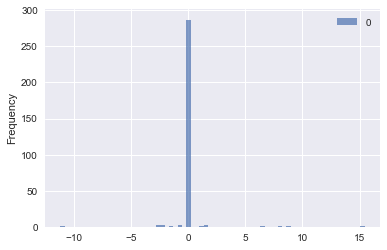

In [2051]:
pd.DataFrame(l1.coef_).plot.hist(bins=70, alpha = 0.7);

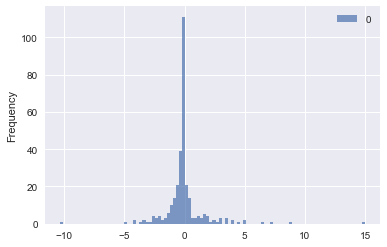

In [2052]:
pd.DataFrame(l2.coef_).plot.hist(bins=100, alpha = 0.7);

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [2053]:
ones = pd.DataFrame(np.ones(Xs.shape[0]))
Xs = pd.concat([ones, Xs], axis = 1)

In [2054]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3, random_state = 42)

In [2055]:
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [2056]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.dot(X, w) # wow

# возвращает вектор прогнозов линейной модели для выборки X, если веса неизвестны
def fit_predict(self, X, Y):
    self.coef_ = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
    return np.dot(X, self.coef_)

# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w (опционально -- регуляризованного)
def get_func(w, X, y, reg = False):
    return np.sum(((y - np.dot(X, w))/ y)**2)/X.shape[0] + np.dot(w, w)*reg

# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w (опционально -- регуляризованного)
def get_grad(w, X, y, reg = False):
    return -2*(np.dot(np.divide(X.T, y), (y - np.dot(X, w)) / y))/X.shape[0] + 2*w.T*reg

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [2057]:
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()
y_train = y_train.as_matrix()
y_test = y_test.as_matrix()

In [2058]:
def grad_descent(X, y, eps=0.0001, step_size=0.1, max_iter=100, reg = False, random_w_init = False):
    w_old = np.zeros(X.shape[1])
    if random_w_init:
        w_old = np.random.normal(size = X.shape[1])    
    func_list = [get_func(w_old, X, y, reg)]
    for j in range(max_iter):           
        grad = get_grad(w_old, X, y, reg)
        w_new = w_old - step_size*grad
        func_list.append(get_func(w_new, X, y, reg))
        if  sum((w_new - w_old)**2)**0.5 < eps:
            print('Converged at {} iteration'.format(j+1))
            break  
        w_old = w_new  
        
    return {'w': w_new, 'MSPE': func_list}

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [2059]:
gd0 = grad_descent(X_train, y_train, step_size=0.001, max_iter = 200)

In [2063]:
gd1 = grad_descent(X_train, y_train, step_size=1)

In [2061]:
gd2 = grad_descent(X_train, y_train, step_size=10)

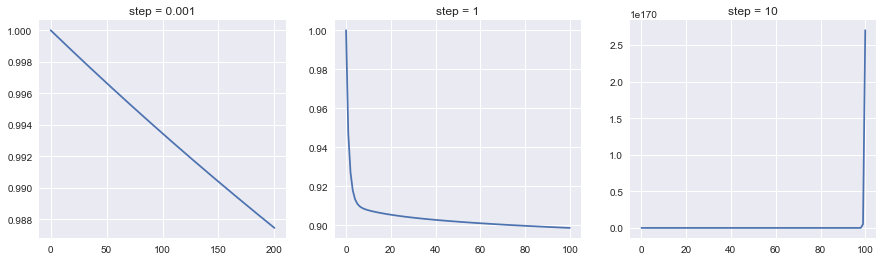

In [2064]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
ax1.plot(list(np.arange(len(gd0['MSPE']))), gd0['MSPE'])
ax1.set_title('step = 0.001')
ax2.plot(list(np.arange(len(gd1['MSPE']))), gd1['MSPE'])
ax2.set_title('step = 1')
ax3.plot(list(np.arange(len(gd2['MSPE']))), gd2['MSPE'])
ax3.set_title('step = 10')
plt.show()

<font color='hotpink'> Чем меньше значение шага, тем медленнее сходимость. Ста итераций не хватило, чтобы получить ту точность, которую дал на таком числе итераций спуск с шагом 1; потребуется несколько тысяч шагов. При этом слишком большое значение шага может привести к тому, что сходимости вообще не будет, и мы уйдём от минимума. Так произошло при выборе шага 10.</font>

In [1864]:
gd3 = grad_descent(X_train, y_train, step_size=0.1, random_w_init = True)

In [1865]:
gd31 = grad_descent(X_train, y_train, step_size=0.1)

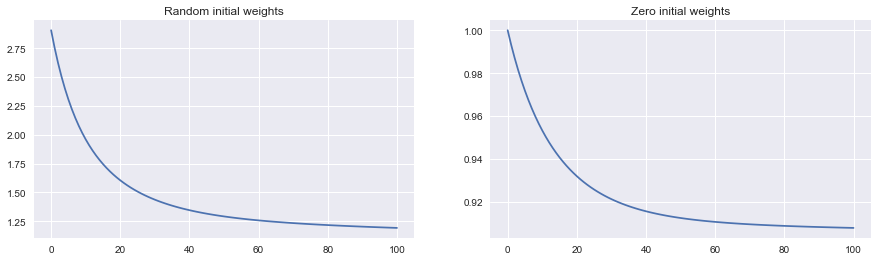

In [1866]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))
ax1.plot(list(np.arange(len(gd3['MSPE']))), gd3['MSPE'])
ax1.set_title('Random initial weights')
ax2.plot(list(np.arange(len(gd31['MSPE']))), gd31['MSPE'])
ax2.set_title('Zero initial weights')
plt.show()

In [1867]:
min(gd3['MSPE']), min(gd31['MSPE'])

(1.1925859653523365, 0.90786127109907211)

<font color='hotpink'> В данном случае многие веса в модели изначально очень близки к 0 (много дамми-переменных, не все важные), поэтому стартовое значение функционала меньше при нулевых начальных весах и поэтому за 100 шагов модель с нулевыми начальными весами успела достичь меньшего значения функционала. При бОльшем количестве шагов модели, вероятно, сойдутся к примерно одинаковому значению MSPE. </font>

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [1868]:
gd4 = grad_descent(X_train, y_train, step_size=1, reg = True, random_w_init = True)

In [1869]:
gd5 = grad_descent(X_train, y_train, step_size=0.1, reg = True, random_w_init = True)

Converged at 48 iteration


In [1871]:
gd6 = grad_descent(X_train, y_train, max_iter = 150, step_size=0.01, reg = True, random_w_init = True)

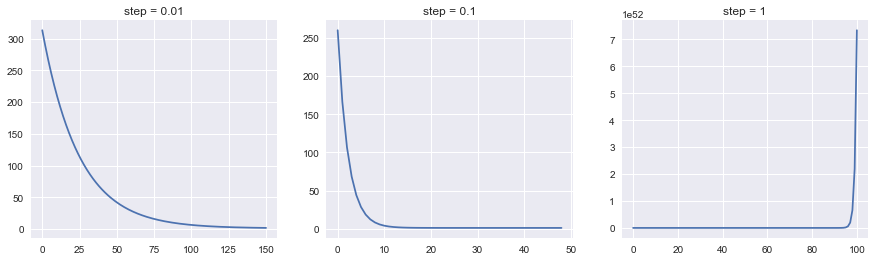

In [1873]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))
ax1.plot(list(np.arange(len(gd6['MSPE']))), gd6['MSPE'])
ax1.set_title('step = 0.01')
ax2.plot(list(np.arange(len(gd5['MSPE']))), gd5['MSPE'])
ax2.set_title('step = 0.1')
ax3.plot(list(np.arange(len(gd4['MSPE']))), gd4['MSPE'])
ax3.set_title('step = 1')
plt.show()

<font color='hotpink'>  Теперь сходится алгоритм ещё быстрее, так как при том же step_size становится больше абсолютное значение градиента функционала </font>

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

Stochastic gradient descent:

In [1930]:
def sgd(X, y, eps=0.0001, step_size = 1, max_iter = 100, reg = False, random_w_init = False):
    w_old = np.zeros(X.shape[1])
    if random_w_init:
        w_old = np.random.normal(size = X.shape[1])    
    func_list = [get_func(w_old, X, y, reg)]
    for j in range(max_iter):
        i = np.random.randint(low = 0, high = X.shape[0], size = 1)[0]
        grad = get_grad(w_old, X[i], y[i], reg)
        w_new = w_old - step_size*grad
        func_list.append(get_func(w_new, X, y, reg))
        if  sum((w_new - w_old)**2)**0.5 < eps:
            print('Converged at {} iteration'.format(j+1))
            break  
        w_old = w_new  
        
    return {'w': w_new, 'MSPE': func_list}

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [2065]:
sgd11 = sgd(X_train, y_train, step_size = 1.5, reg = False, max_iter = 500)

In [1993]:
y_pred = make_pred(X_test, sgd11['w'])
print('MSPE: {}, MSE: {}, R2: {}'.format(get_func(sgd11['w'], X_test, y_test), 
                                      mean_squared_error(y_test, make_pred(X_test, sgd11['w'])),
                                      r2_score(y_test, make_pred(X_test, sgd11['w']))))

MSPE: 0.9122949565170873, MSE: 1464.7314867741231, R2: -0.09498801780477217


In [1996]:
sgd12 = sgd(X_train, y_train, step_size = 1.5, reg = False, max_iter = 500)

In [1997]:
y_pred = make_pred(X_test, sgd12['w'])
print('MSPE: {}, MSE: {}, R2: {}'.format(get_func(sgd12['w'], X_test, y_test), 
                                      mean_squared_error(y_test, make_pred(X_test, sgd12['w'])),
                                      r2_score(y_test, make_pred(X_test, sgd12['w']))))

MSPE: 0.9316724625376365, MSE: 1459.9319947052284, R2: -0.0914000657777676


**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

<font color='hotpink'> Аналогично пункту 17, добавление регуляризации увеличивает скорость сходимости метода. </font>

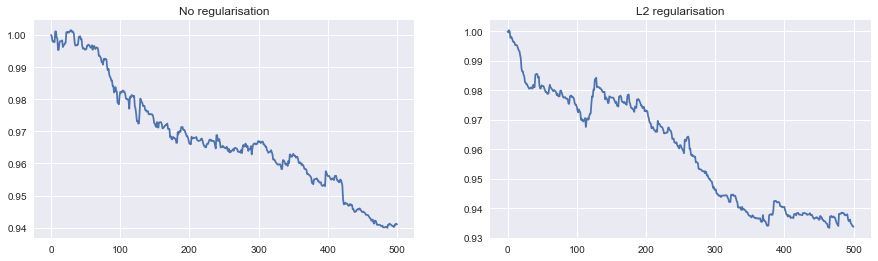

In [2066]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))
ax1.plot(list(np.arange(len(sgd11['MSPE']))), sgd11['MSPE'])
ax1.set_title('No regularisation')
ax2.plot(list(np.arange(len(sgd12['MSPE']))), sgd12['MSPE'])
ax2.set_title('L2 regularisation')
plt.show()

<font color='hotpink'> Для сравнения, мини-батч градиентный спуск сходится лучше, потому что оценка антиградиента точнее:</font>

In [1958]:
def mbgd(X, y, eps=0.0001, step_size = 1, max_iter = 100, reg = False, random_w_init = False, batch_size = np.sqrt(X.shape[0])):
    w_old = np.zeros(X.shape[1])
    if random_w_init:
        w_old = np.random.normal(size = X.shape[1])    
    func_list = [get_func(w_old, X, y, reg)]
    for j in range(max_iter):
        n = np.random.randint(low = 0, high = X.shape[0], size = int(batch_size))
        grad = get_grad(w_old, np.array([X[i] for i in n]), np.array([y[i] for i in n]), reg)
        w_new = w_old - step_size*grad
        func_list.append(get_func(w_new, X, y, reg))
        if  sum((w_new - w_old)**2)**0.5 < eps:
            print('Converged at {} iteration'.format(j+1))
            break  
        w_old = w_new  
        
    return {'w': w_new, 'MSPE': func_list}

In [1982]:
mbgd11 = mbgd(X_train, y_train, step_size = 0.3, reg = False, max_iter = 500)

In [1988]:
mbgd12 = mbgd(X_train, y_train, step_size = 0.01, reg = True, max_iter = 700)

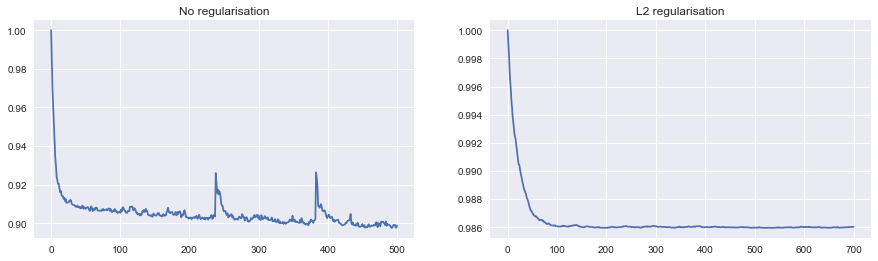

In [1989]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))
ax1.plot(list(np.arange(len(mbgd11['MSPE']))), mbgd11['MSPE'])
ax1.set_title('No regularisation')
ax2.plot(list(np.arange(len(mbgd12['MSPE']))), mbgd12['MSPE'])
ax2.set_title('L2 regularisation')
plt.show()

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [2067]:
lr = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [2069]:
get_func(lr.coef_, X_test, y_test), get_func(gd5['w'], X_test, y_test)

(22.524497675367233, 0.97345455360135802)

In [2070]:
mean_squared_error(y_test, y_pred), mean_squared_error(y_test, np.dot(X_test, gd5['w']))

(1033.4939298835457, 1454.7675475352412)

<font color='hotpink'> При поиске этих двух решений минимизировались разные функционалы, поэтому решение, полученное обученной в этом пункте стандартной линейной регрессией, минимизирующее MSE, не даёт минимальное значение MSPE, а MSE обученной в этом пункте модели меньше, чем MSE решения из пункта 17. </font>